In [8]:
%%writefile Dash_1.py

import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

nltk.download('wordnet')
nltk.download('omw-1.4')

import streamlit as st
import pandas as pd
import plost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
#%matplotlib inline
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from PIL import Image
#import text2emotion as te
import os 
import base64
import warnings
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
st.set_option('deprecation.showPyplotGlobalUse', False)
from nltk.corpus import stopwords


#############

st.set_page_config(layout='wide', initial_sidebar_state='expanded')

with open("C:/Users/Takudzwa Stephen/Desktop/Datatude/dashboard-v2-master/style.css") as f:
    st.markdown(f'<style>{f.read()}</style>', unsafe_allow_html=True)
  
st.title("Service Delivery in South Africa")
st.header("Early Detection of Civil Unrest Using Social Media Data")
 
st.sidebar.header('Datatude Dashboard')    
st.sidebar.header('`insights`')

#reading the dataset
data1=pd.read_excel("C:/Users/Takudzwa Stephen/Desktop/Datasets/Clean_twitter_data.xlsx")
data2=pd.read_csv("C:/Users/Takudzwa Stephen/Desktop/Datasets/Twitter_text_data.csv")

Options = ["Sentiment Analysis", "Data Visualisation"]
bar = st.sidebar.selectbox("Select Option", Options)
if bar == "Sentiment Analysis" :
    if st.button("print Twitter Dataset"):
        st.write(data2.head(15))
    if st.button("Number of rows & columns)"):
        print(st.write(data2.shape))
    if st.button("Attributes Names"):
        st.write(data2.columns)
    if st.button("print Clean Dataset"):
        st.write(data1.head(10))   
        
    st.write("`Clean and Original Twitter comments`") 
    if st.button("Print Original tweets"):
        st.write(data2["text"].head(10))
    if st.button("Print Clean tweets"):
        st.write(data1["text"].head(10))
        

    st.write('``Upload Dataset and Text to Clean and Analyse``')
    with st.expander('Analyze Text'):
        text = st.text_input('Text here: ')
        if text:
            blob = TextBlob(text)
            st.write('Polarity: ', round(blob.sentiment.polarity,2))
            st.write('Subjectivity: ', round(blob.sentiment.subjectivity,2))


        pre = st.text_input('Clean Text: ')
        if pre:
            st.write(cleantext.clean(pre, clean_all= False, extra_spaces=True ,
                                     stopwords=True ,lowercase=True ,numbers=True , punct=True))

    with st.expander('Analyze CSV'):
        upl = st.file_uploader('Upload file')

        def score(x):
            blob1 = TextBlob(x)
            return blob1.sentiment.polarity

    #
        def analyze(x):
            if x >= 0.5:
                return 'Positive'
            elif x <= -0.5:
                return 'Negative'
            else:
                return 'Neutral'

    #
        if upl:
            df = pd.read_excel(upl)
            del df['Unnamed: 0']
            df['score'] = df['tweets'].apply(score)
            df['analysis'] = df['score'].apply(analyze)
            st.write(df.head(10))

            @st.cache
            def convert_df(df):
                # IMPORTANT: Cache the conversion to prevent computation on every rerun
                return df.to_csv().encode('utf-8')

            csv = convert_df(df)

            st.download_button(
                label="Download data as CSV",
                data=csv,
                file_name='sentiment.csv',
                mime='text/csv',
            )


      
    
if bar =="Data Visualisation":
    st.text("Twitter Data")
 
 #Sentiments bar graph
    
    if st.button("Sentiment counts "):
        fig=plt.figure(figsize = (10,5))
        plt.title("Sentiment counts")
        sns.countplot(x = 'sentiment', data = data1)
        st.write(fig)

#Sentiment pie chart

    if st.button("Sentiments Pie Chart"):
        fig = plt.figure(figsize = (7,7))
        colors = ("yellowgreen", "gold", "red")
        wp = {'linewidth':2, "edgecolor" : "black"}
        tags = data1['sentiment'].value_counts()
        explode = (0.1, 0.1, 0.1)
        tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors, startangle=90, wedgeprops = wp, explode = explode, label = '')
        plt.title('distribution of sentiments')
        st.write(fig)
        
# word cloud
    if st.button("Word Cloud"):
        df1 = pd.read_excel("C:/Users/Takudzwa Stephen/Desktop/Datasets/clean_protest_data.xlsx")

        df1.drop_duplicates(subset = "text", keep = "first", inplace = True)

        df1['text'] = df1['text'].str.replace(r"RT", " ")

        

        def data_processing(text):
            text = text.lower()
            text = re.sub(r"https\S+\www\S+",'', text, flags = re.MULTILINE)
            text = re.sub(r'@\S+','', str(text))
            text = re.sub(r'[^\w\s]','', text)
            text_tokens = word_tokenize(text)
            filtered_text = [w for w in text_tokens if not w in stop_words]
            return " ".join(filtered_text)

        df1.text = df1['text'].apply(data_processing)

        #stemming
        import nltk
        from nltk.stem import PorterStemmer

        stemmer = PorterStemmer()

        df1['text'] = df1['text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))


        from nltk.stem.wordnet import WordNetLemmatizer

        lemmatizer = WordNetLemmatizer()
        df1['text'] = df1['text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
        df1['text'].head()

        def polarity(text):
            return TextBlob(text).sentiment.polarity

        df1['polarity'] = df1['text'].apply(polarity)

        def sentiment(label):
            if label < 0:
                return "negative"
            elif label == 0:
                return "neutral"
            elif label > 0:
                return "positive"

        df1['sentiment'] = df1['polarity'].apply(sentiment)

        # wordcloud library
        from wordcloud import WordCloud

        # joing the different text together
        long_string = ','.join(list(df1['text'].values))
        
        
        # Create some sample text
        text = long_string

        # Create and generate a word cloud image:
        wordcloud = WordCloud().generate(text)

        # Display the generated image:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        st.pyplot()
        

st.sidebar.header("`Sentiment Classification Models`")    

Options3 = ["-Choose Model-", "SVM", "Logistic Regression", "Decision Tree","Random Forest"]
bar = st.sidebar.selectbox("Select Option", Options3)
if bar == "SVMl" :
    st.write("Support Vector Machine")
        
    if st.button("Logistic Regression"):
        st.write("Logistic Regression")


Overwriting Dash_1.py


In [32]:
import streamlit as st
import pandas as pd
import plost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
#%matplotlib inline
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from PIL import Image
#import text2emotion as te
import os 
import base64
import warnings

In [34]:
data2=pd.read_csv("C:/Users/Takudzwa Stephen/Desktop/Datasets/Twitter_text_data.csv")
data1=pd.read_excel("C:/Users/Takudzwa Stephen/Desktop/Datasets/Clean_twitter_data.xlsx")

In [69]:
from textblob import TextBlob
import pandas as pd
import streamlit as st
import cleantext


ModuleNotFoundError: No module named 'cleantext'

In [70]:
!pip install cleantext

Defaulting to user installation because normal site-packages is not writeable


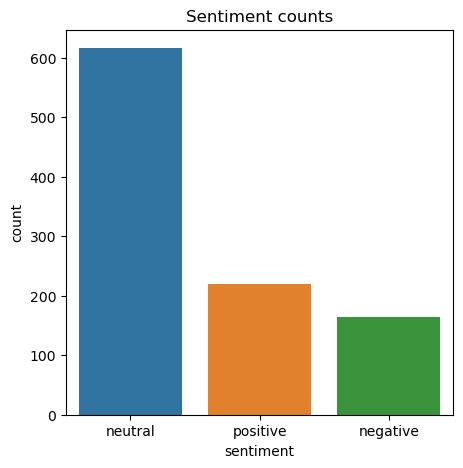

In [71]:
fig = plt.figure(figsize = (5,5))
plt.title("Sentiment counts")
sns.countplot(x = 'sentiment', data = data1)
plt.show()

In [78]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')

nltk.download('wordnet')
nltk.download('omw-1.4')

# wordcloud library
from wordcloud import WordCloud

# joing the different text together
long_string = ','.join(list(data1['text'].values))

#create the Wordcloud
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3, contour_color = 'stealblue')

#generate a word clcoud 
wordcloud.generate(long_string)

#visualise the word cloud 
wordcloud.to_image()


[nltk_data] Downloading package stopwords to C:\Users\Takudzwa
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Takudzwa
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Takudzwa
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Takudzwa
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


TypeError: sequence item 639: expected str instance, float found

In [64]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [66]:
from wordcloud import WordCloud
from collections import Counter



def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    
data1=data1.head(1000)
print("Processing data...")
data1['clean']=data1['text'].map(clean)
data1['clean_text']=data1['clean'].apply(lambda x: " ".join([str(word) for word in x]))



print("Creating word clouds...")
positive_words=" ".join(data1[data1.label==1]['clean_text'].values)
negative_words=" ".join(data1[data1.label==0]['clean_text'].values)



generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")  

Processing data...


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Takudzwa Stephen/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Takudzwa Stephen\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [58]:
# wordcloud library
from wordcloud import WordCloud

# joing the different text together
long_string = ','.join(list(data1['text'].values))

#create the Wordcloud
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3, contour_color = 'stealblue')

#generate a word clcoud 
wordcloud.generate(long_string)

#visualise the word cloud 
wordcloud.to_image()

TypeError: sequence item 639: expected str instance, float found

In [3]:
import pandas as pd

df=pd.read_excel("C:/Users/Takudzwa Stephen/Desktop/Datasets/Clean_twitter_data.xlsx")

In [27]:
#df.head()
df["text"].head(10)

0    farm south east den popul place enti httpstcoo...
1    work businessmen woman make south east taiwan ...
2    climat agenda impact agricultur get overview g...
3    minist agricultur forestri 15 year teodoro obi...
4    south africa land reform polici remain highli ...
5    absa agritrend 2022 report provid insight indu...
6    high rate unemploy south africa expens food be...
7    south africa land reform polici remain highli ...
8    south africa drc cameroon welcom visit explor ...
9    south africa drc cameroon welcom visit explor ...
Name: text, dtype: object

In [31]:
import streamlit as st
import pandas as pd
import plost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
#%matplotlib inline
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from PIL import Image
#import text2emotion as te
import os 
import base64
import warnings

In [35]:
%%writefile Dash_1.py

import streamlit as st
import plost
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
#%matplotlib inline
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from PIL import Image
#import text2emotion as te
import os 
import base64
import warnings

st.set_page_config(layout='wide', initial_sidebar_state='expanded')

with open('style.css') as f:
    st.markdown(f'<style>{f.read()}</style>', unsafe_allow_html=True)

st.title("Service Delivery In South Africa")
st.header("Early Detection of Civil Unrest Using Social Media Data")

st.sidebar.title('```DATATUDE```')
st.sidebar.write("`data attitude`")

Options = ["Sentiment Analysis", "Data Visualisation"]
bar = st.sidebar.selectbox("Select Option", Options)
if bar == "Sentiment Analysis" :
    if st.button("print dataset"):
        data = pd.read_csv("Data.csv")
        st.write(data.head())
        
    if st.button("show dataset shape (rows & columns)"):
        st.write(data.shape)
    
if bar =="Data Visualisation":
    st.text("We are gonna be just fine")
    
Options2 = ["modeling", "post processing"]
bar2 = st.sidebar.selectbox("Select Option", Options2)



Overwriting Dash_1.py


In [36]:
main_bg = "3064.jpg"
main_bg_ext = "jpg"

side_bg = "3064.jpg"
side_bg_ext = "jpg"

st.markdown(
    f"""
    <style>
    .reportview-container {{
        background:url(data:Image/{main_bg_ext};base64,{base64.b64encode(open(main_bg, "rb").read()).decode()})
    }}
    
    </style>
    """,
    unsafe_allow_html = True
)


NameError: name 'st' is not defined